#forecasting salary based on postion and education level 

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load the employee data
employee_data = pd.read_csv('/content/EMPLOYEE DATA_Train - الورقة1 (1).csv')

# Prepare the data for modeling
X = employee_data[['Postion name', 'Education level']]
y = employee_data['Salary']

# Convert categorical variables to dummy variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Remove rows with missing values
X_train = X_train.dropna()
y_train = y_train.dropna()

# Fit the imputer on the training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(X_train)

# Train the Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Load the new employee data
new_employee_data = pd.read_csv('/content/EMPLOYEE DATA - EMPLOYEE DATA.csv')
new_X = pd.get_dummies(new_employee_data[['Postion name', 'Education level']])

# Replace missing values with the mean of each column
new_X = imputer.transform(new_X)

# Convert new_X to a Pandas DataFrame
new_X = pd.DataFrame(new_X, columns=X.columns)

# Make predictions on new data
new_y_pred = regressor.predict(new_X)

# Merge the predicted salaries with the position names
new_salaries = pd.DataFrame({'Position': new_employee_data['Postion name'], 'Education level': new_employee_data['Education level'], 'Salary': new_y_pred})

# Print the predicted salaries for new employees with position names and education
new_salaries

,Position,Education level,Salary
0,senior accountant,Master,25000.000000
1,Accountant,Bacholer,10000.000000
2,Database Administrator,Bacholer,9000.000000
3,human capital manger,Master,26000.000000
4,Data analyst Consaltant,Bacholer,20000.000000
5,IT COOP,Bacholer,7818.181818
6,Finance specialist,Bacholer,8000.000000
7,PMO manger,Master,26318.181818
8,Senior Database Administrator,Master,28250.000000
9,Senior data analyst,Master,24500.000000


# Plot the predicted salaries as a bar chart

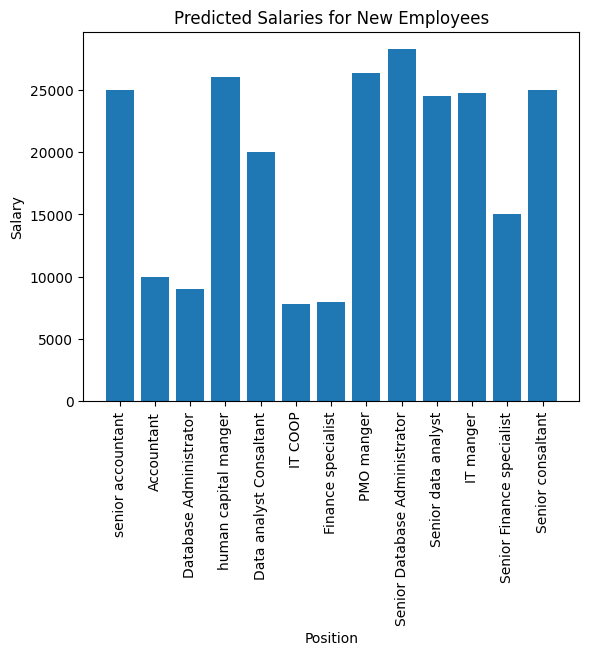

In [ ]:
import matplotlib.pyplot as plt
# Plot the predicted salaries as a bar chart
plt.bar(new_salaries['Position'], new_salaries['Salary'])
plt.xticks(rotation=90)
plt.xlabel('Position')
plt.ylabel('Salary')
plt.title('Predicted Salaries for New Employees')
plt.show()

# the accuracy rate of our model

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error (MSE): {:.2f}".format(mse))

# Calculate root mean squared error (RMSE)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root mean squared error (RMSE): {:.2f}".format(rmse))

# Calculate mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean absolute error (MAE): {:.2f}".format(mae))

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: {:.2f}".format(r2))

Mean squared error (MSE): 132321797.52
Root mean squared error (RMSE): 11503.12
Mean absolute error (MAE): 8957.79
R-squared: -0.41


#prediction the employee status

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LogisticRegression

# Load the employee data
employee_data = pd.read_csv('/content/EMPLOYEE DATA_Train - (2).csv')

# Prepare the data for modeling
X = employee_data[['performance rate', 'Salary']]
y = employee_data['Employee status']

# Train the Logistic Regression model
clf = LogisticRegression()
clf.fit(X, y)

# Make predictions for all employees
predictions = clf.predict(X)

# Add the predictions to the dataframe
employee_data['Will Resign'] = predictions

# Print the employees and their predicted resignation status
employee_data[['Employee ID', 'performance rate', 'Salary', 'Will Resign']]

,Employee ID,performance rate,Salary,Will Resign
0,111444,4.0,1500,Active
1,111586,5.0,10000,Active
2,111996,3.9,6000,Active
3,111003,5.0,25000,Active
4,111254,5.0,22000,Active
5,111333,2.0,8000,Active
6,111231,3.0,9000,Active
7,111523,4.0,10000,Active
8,111477,4.5,28000,Active
9,111989,4.0,25000,Active


# Plot the predicted Employees status as a bar chart

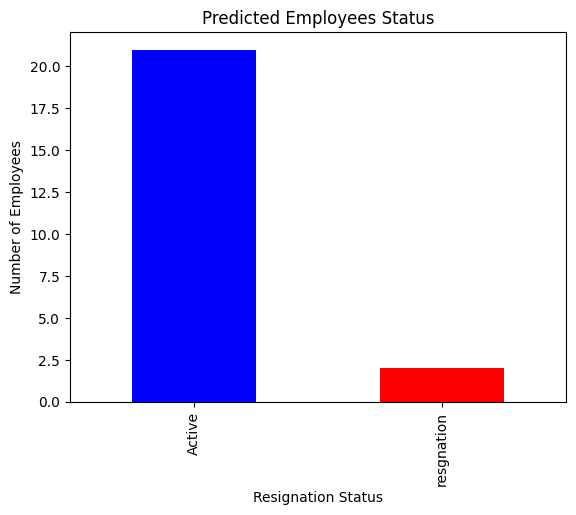

In [ ]:
import matplotlib.pyplot as plt

# Group the employees by their predicted resignation status
resign_counts = employee_data.groupby('Will Resign').size()

# Create a bar chart
resign_counts.plot(kind='bar', color=['blue', 'red'])

# Set the chart title and axis labels
plt.title('Predicted Employees Status')
plt.xlabel('Resignation Status')
plt.ylabel('Number of Employees')

# Show the chart
plt.show()